<a href="https://colab.research.google.com/github/Jean-Tshibangu-jtm/Prediction_Fraude_avec_Arbre_de_Decision/blob/master/tree_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
dataset = pd.read_csv('prediction_de_fraud.csv')

In [ ]:
dataset.shape

(1421223, 11)

In [ ]:
#récupération les données predictives
X = dataset.drop('isFraud', axis = 1).values
target = dataset['isFraud'].values


In [ ]:
from sklearn.preprocessing import LabelEncoder
labEncr_X = LabelEncoder()
X[:,1] = labEncr_X.fit_transform(X[:,1])
X[:,3] = labEncr_X.fit_transform(X[:,3])
X[:,6] = labEncr_X.fit_transform(X[:,6])

In [ ]:
#Initialisation du classifieur Arbre de décision
decTree_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 50,
max_depth= 3, min_samples_leaf=0.02)

In [ ]:
# Adapter le classificateur aux données
decTree_2.fit(X, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.02, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [ ]:
X_names = dataset.drop('isFraud', axis = 1)

In [ ]:
data = tree.export_graphviz(decTree_2, out_file=None, feature_names= X_names.columns.values, proportion= True)

In [ ]:
graph = pydotplus.graph_from_dot_data(data) 

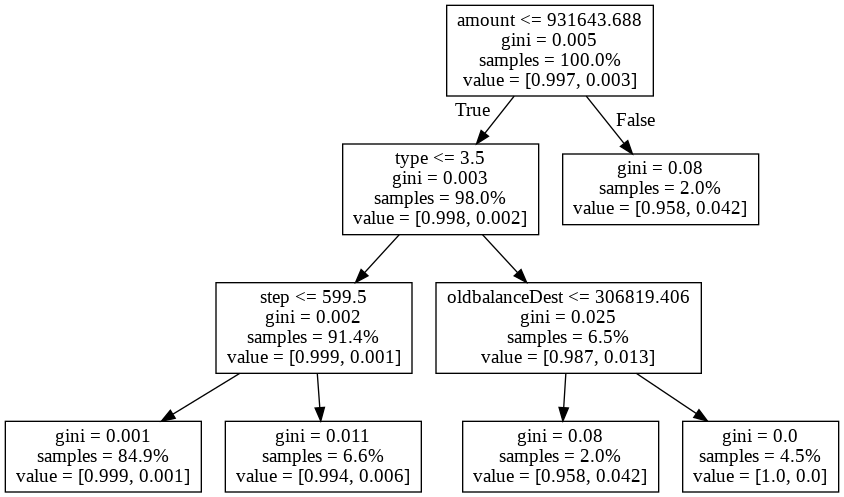

In [ ]:
Image(graph.create_png())